# Importing the libraries

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


tf.__version__

'2.4.1'

# Importing Keras and checking its version

In [2]:
from tensorflow import keras

keras.__version__

'2.4.0'

# Downloading train and test dataset

In [3]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.fashion_mnist.load_data()

# Checking the shape of train and test dataset

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Making a validation dataset

In [5]:
x_valid = x_train[:4000]
x_train = x_train[4000:]
y_valid = y_train[:4000]
y_train = y_train[4000:]

# Checking the shape of validation dataset and new train dataset

In [6]:
print(x_valid.shape)
print(y_valid.shape)
print(x_train.shape)
print(y_train.shape)

(4000, 28, 28)
(4000,)
(56000, 28, 28)
(56000,)


# Scaling the values of train, validation and test dataset between 0 and 1

In [7]:
x_train= x_train/255.0
x_valid = x_valid/255.0
x_test = x_test/255.0



# List of all labels in the dataset

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Looking at the image of the first label in the train dataset

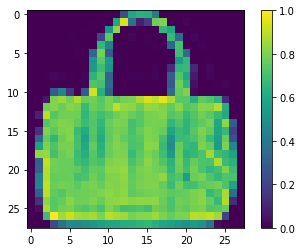

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Getting the name of the first label 

In [10]:
class_names[y_train[0]]

'Bag'

# Plotting first 25 images with labels  

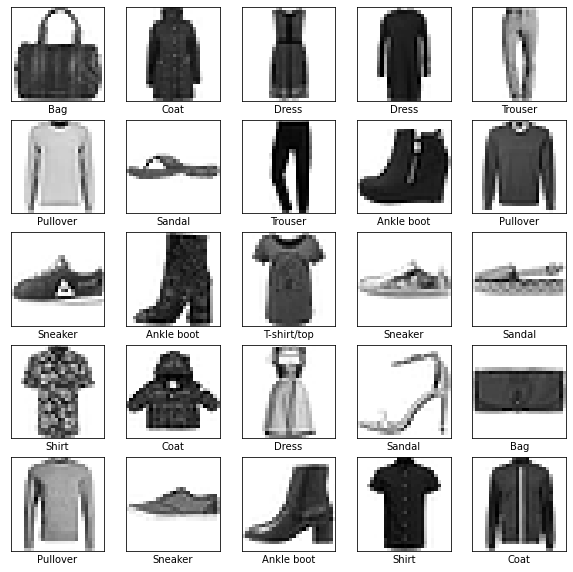

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Creating a Sequential Model

In [70]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(400,activation='relu'),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation= 'softmax')
])

# Checking the summary of the model

In [71]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_20 (Dense)             (None, 250)               100250    
_________________________________________________________________
dense_21 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_22 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                510       
Total params: 444,910
Trainable params: 444,910
Non-trainable params: 0
________________________________________________

# Compile the model

In [72]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="adam",
 metrics=["accuracy"])

# Using EarlyStopping to reduce overfitting

In [73]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

# Training the model

In [74]:
history = model.fit(x_train,y_train,epochs = 10,batch_size=32,validation_data=(x_valid, y_valid),verbose=2,callbacks=[early_stopping])

Epoch 1/10
1750/1750 - 15s - loss: 0.5007 - accuracy: 0.8196 - val_loss: 0.4453 - val_accuracy: 0.8385
Epoch 2/10
1750/1750 - 12s - loss: 0.3734 - accuracy: 0.8633 - val_loss: 0.4041 - val_accuracy: 0.8537
Epoch 3/10
1750/1750 - 11s - loss: 0.3362 - accuracy: 0.8752 - val_loss: 0.3661 - val_accuracy: 0.8665
Epoch 4/10
1750/1750 - 11s - loss: 0.3121 - accuracy: 0.8831 - val_loss: 0.3477 - val_accuracy: 0.8737
Epoch 5/10
1750/1750 - 11s - loss: 0.2939 - accuracy: 0.8909 - val_loss: 0.3137 - val_accuracy: 0.8848
Epoch 6/10
1750/1750 - 11s - loss: 0.2762 - accuracy: 0.8968 - val_loss: 0.3078 - val_accuracy: 0.8898
Epoch 7/10
1750/1750 - 11s - loss: 0.2627 - accuracy: 0.9022 - val_loss: 0.3180 - val_accuracy: 0.8867


# Plotting the loss and accuracy

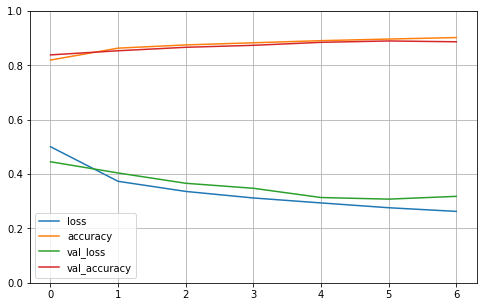

In [75]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


# Evaluating the model

In [76]:
model.evaluate(x_test,y_test,batch_size=32,verbose=2)

313/313 - 1s - loss: 0.3425 - accuracy: 0.8755


[0.3424845337867737, 0.8755000233650208]